<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#DFT-Model" data-toc-modified-id="DFT-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DFT Model</a></span><ul class="toc-item"><li><span><a href="#Analysis" data-toc-modified-id="Analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Analysis</a></span></li><li><span><a href="#Synthesis" data-toc-modified-id="Synthesis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Synthesis</a></span></li><li><span><a href="#plots" data-toc-modified-id="plots-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>plots</a></span></li><li><span><a href="#windowing-effect" data-toc-modified-id="windowing-effect-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>windowing effect</a></span></li></ul></li><li><span><a href="#STFT-Model" data-toc-modified-id="STFT-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>STFT Model</a></span><ul class="toc-item"><li><span><a href="#Analysis:-STFT" data-toc-modified-id="Analysis:-STFT-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Analysis: STFT</a></span></li><li><span><a href="#Synthesis:-Inverse-STFT" data-toc-modified-id="Synthesis:-Inverse-STFT-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Synthesis: Inverse STFT</a></span></li><li><span><a href="#plots" data-toc-modified-id="plots-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plots</a></span></li></ul></li><li><span><a href="#Fractional-Fourier-Transform:-FRFT" data-toc-modified-id="Fractional-Fourier-Transform:-FRFT-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fractional Fourier Transform: FRFT</a></span><ul class="toc-item"><li><span><a href="#Analysis" data-toc-modified-id="Analysis-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Analysis</a></span></li><li><span><a href="#Synthesis" data-toc-modified-id="Synthesis-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Synthesis</a></span></li><li><span><a href="#plots" data-toc-modified-id="plots-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>plots</a></span></li></ul></li><li><span><a href="#Sinasodual-Model:-Audio" data-toc-modified-id="Sinasodual-Model:-Audio-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sinasodual Model: Audio</a></span><ul class="toc-item"><li><span><a href="#Reading-audio-file-from-url" data-toc-modified-id="Reading-audio-file-from-url-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Reading audio file from url</a></span></li><li><span><a href="#Analysis:-Decompising-into-N-sinasodal-tracks" data-toc-modified-id="Analysis:-Decompising-into-N-sinasodal-tracks-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Analysis: Decompising into N-sinasodal tracks</a></span></li><li><span><a href="#Synthesis-of-audio-from-N-sinasodal-tracks" data-toc-modified-id="Synthesis-of-audio-from-N-sinasodal-tracks-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Synthesis of audio from N-sinasodal tracks</a></span></li><li><span><a href="#plots" data-toc-modified-id="plots-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>plots</a></span></li></ul></li></ul></div>

# Analysis and Synthesis Models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spkit as sp

sp.__version__

'0.0.9.4'

## DFT Model

In [2]:
X,names = sp.data.load_data.eegSample()
fs=128
x = X[:,1]
t = np.arange(len(x))/fs
print(x.shape)

(2048,)


### Analysis

In [3]:
mX, pX, N = sp.dft_analysis(x, window='boxcar')
print(mX.shape,pX.shape, N)

(1025,) (1025,) 2048


### Synthesis

In [4]:
y = sp.dft_synthesis(mX, pX, M=N, window='boxcar')
print(y.shape)

(2048,)


### plots

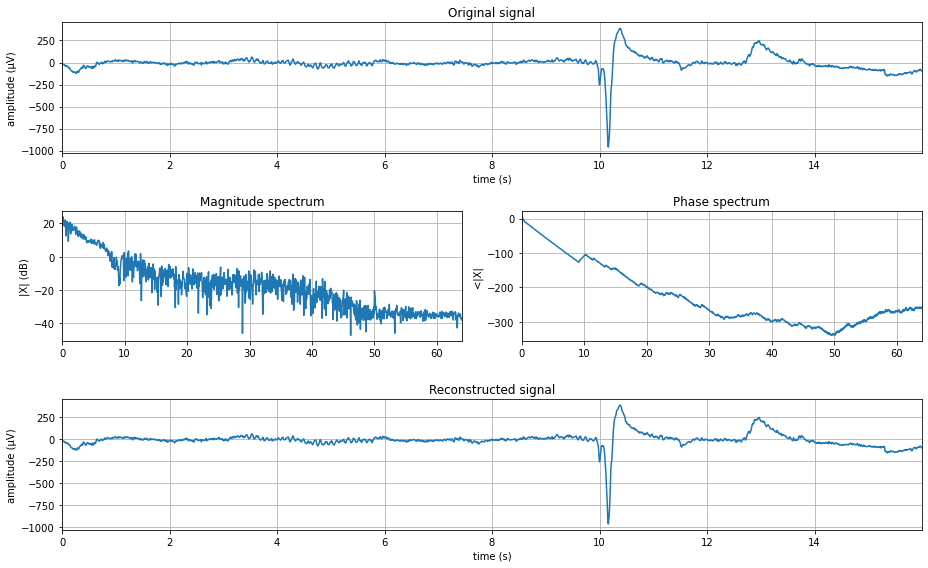

In [40]:
plt.figure(figsize=(13,8))
plt.subplot(311)
plt.plot(t,x)
plt.xlim([t[0],t[-1]])
plt.grid()
plt.xlabel('time (s)')
plt.title('Original signal')
#plt.xlabel('time (s)')
plt.ylabel('amplitude (μV)')

plt.subplot(323)
fr = (fs/2)*np.arange(len(mX))/(len(mX)-1)
plt.plot(fr,mX)
plt.xlim([fr[0],fr[-1]])
plt.grid()
plt.ylabel('|X| (dB)')
plt.title('Magnitude spectrum')
plt.subplot(324)
plt.plot(fr,pX)
plt.xlim([fr[0],fr[-1]])
plt.grid()
plt.ylabel('<|X|')
plt.title('Phase spectrum')

plt.subplot(313)
plt.plot(t,y)
plt.xlim([t[0],t[-1]])
plt.grid()
plt.title('Reconstructed signal')
plt.xlabel('time (s)')
plt.ylabel('amplitude (μV)')
plt.tight_layout()
plt.show()

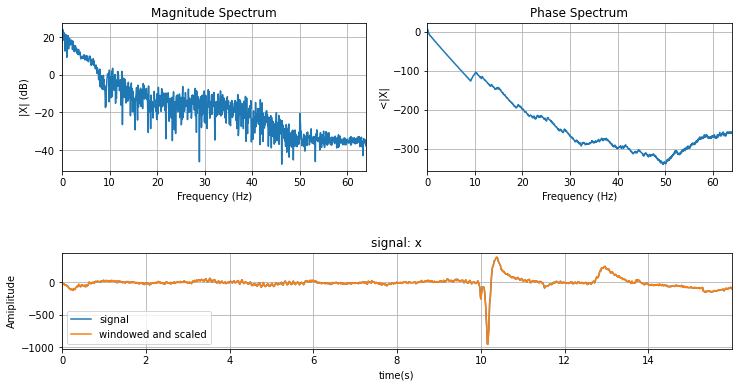

In [41]:
mX, pX, N = sp.dft_analysis(x, window='boxcar',plot=2, fs=fs)

### windowing effect

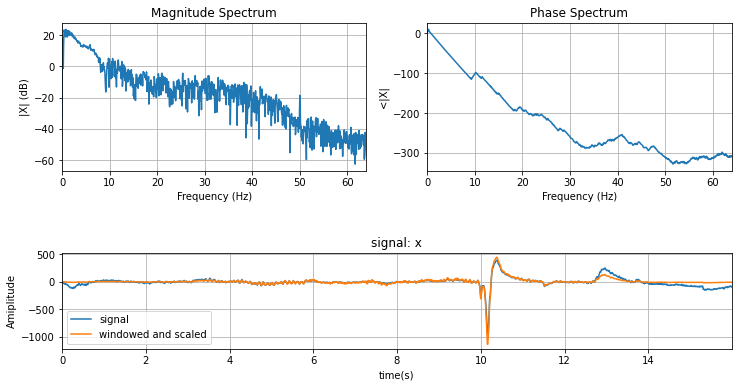

In [42]:
mX, pX, N = sp.dft_analysis(x, window='hamm',plot=2, fs=fs)

## STFT Model

In [5]:
X,names = sp.data.load_data.eegSample()
fs=128
x = X[:,1]
t = np.arange(len(x))/fs
print(x.shape)

(2048,)


### Analysis: STFT

In [7]:
mXt,pXt = sp.stft_analysis(x, winlen=128, overlap=32,window='blackmanharris',nfft=None)
print(mXt.shape, pXt.shape)

(65, 65) (65, 65)


### Synthesis: Inverse STFT

In [8]:
y = sp.stft_synthesis(mXt, pXt, winlen=128, overlap=32)
print(y.shape)

(2080,)


### plots

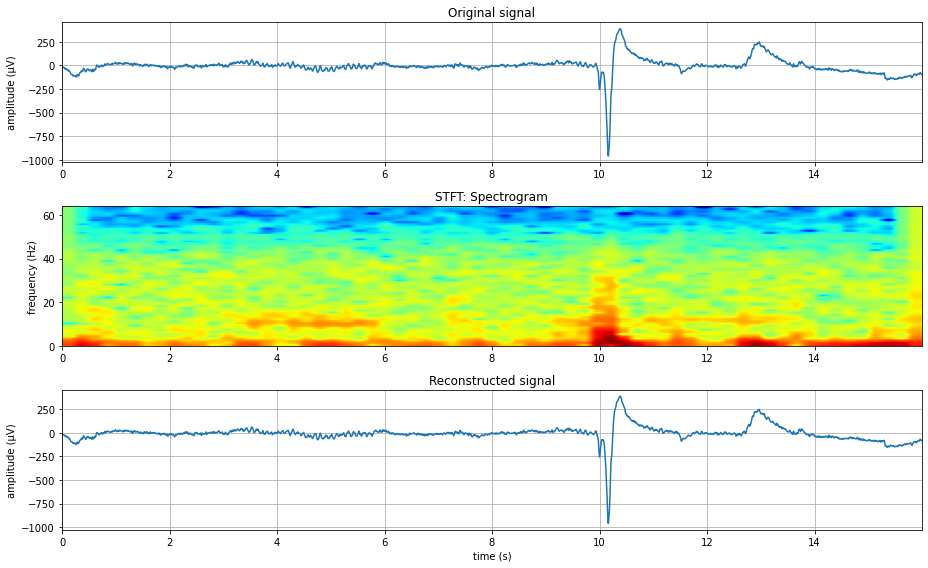

In [9]:
plt.figure(figsize=(13,8))
plt.subplot(311)
plt.plot(t,x)
plt.xlim([t[0],t[-1]])
plt.grid()
plt.title('Original signal')
#plt.xlabel('time (s)')
plt.ylabel('amplitude (μV)')

plt.subplot(312)
plt.imshow(mXt.T,aspect='auto',origin='lower',cmap='jet',extent=[t[0],t[-1],0,fs/2])
plt.title('STFT: Spectrogram')
#plt.xlabel('time (s)')
plt.ylabel('frequency (Hz)')

plt.subplot(313)
plt.plot(t,y[:len(t)])
plt.xlim([t[0],t[-1]])
plt.grid()
plt.title('Reconstructed signal')
plt.xlabel('time (s)')
plt.ylabel('amplitude (μV)')
plt.tight_layout()
plt.show()

## Fractional Fourier Transform: FRFT

In [10]:
X,names = sp.data.load_data.eegSample()
fs=128
x = X[:,1]
t = np.arange(len(x))/fs
print(x.shape)

(2048,)


### Analysis

In [12]:
Xa = sp.frft(x.copy(),alpha=0.2)
Xa.shape

(2048,)

### Synthesis

In [13]:
y = sp.frft(Xa.copy(),alpha=-0.2)
y.shape

(2048,)

### plots

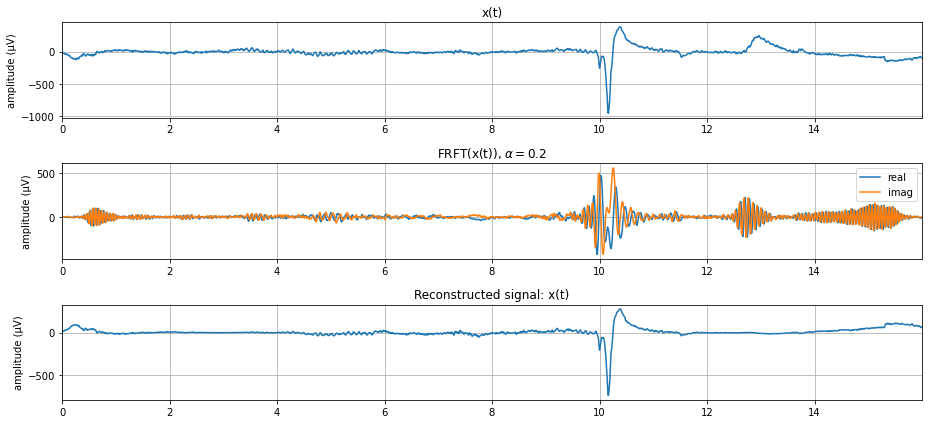

In [14]:
plt.figure(figsize=(13,6))
plt.subplot(311)
plt.plot(t,x)
plt.xlim([t[0],t[-1]])
plt.grid()
plt.title('x(t)')
#plt.xlabel('time (s)')
plt.ylabel('amplitude (μV)')

plt.subplot(312)
plt.plot(t,Xa.real,label='real')
plt.plot(t,Xa.imag,label='imag')
plt.xlim([t[0],t[-1]])
plt.grid()
plt.title(r'FRFT(x(t)), $\alpha=0.2$')
#plt.xlabel('time (s)')
plt.ylabel('amplitude (μV)')
plt.legend()


plt.subplot(313)
plt.plot(t,y.real)
plt.xlim([t[0],t[-1]])
plt.grid()
plt.title('Reconstructed signal: x(t)')
#plt.xlabel('time (s)')
plt.ylabel('amplitude (μV)')
plt.tight_layout()
plt.show()

## Sinasodual Model: Audio

### Reading audio file from url

In [17]:
import requests
from scipy.io import wavfile
import IPython

In [18]:
path1 = 'https://raw.githubusercontent.com/Nikeshbajaj/spkit/master/spkit/data/piano.wav'
path2 = 'https://raw.githubusercontent.com/Nikeshbajaj/spkit/master/spkit/data/singing-female.wav'
print(path2)

https://raw.githubusercontent.com/Nikeshbajaj/spkit/master/spkit/data/singing-female.wav


In [35]:
req = requests.get(path2)
with open('myfile.wav', 'wb') as f:
        f.write(req.content)
        
fs, x = wavfile.read('myfile.wav')
t = np.arange(len(x))/fs

x=x.astype(float)

print(x.shape, fs)

(272243,) 44100


### Analysis: Decompising into N-sinasodal tracks

In [24]:
N=20

In [25]:
fXst, mXst, pXst = sp.sineModel_analysis(x,fs,winlen=3001,overlap=750,
                            window='blackmanharris', nfft=None, thr=-10, 
                            maxn_sines=N,minDur=0.01, freq_devOffset=10,freq_devSlope=0.1)

print(fXst.shape, mXst.shape, pXst.shape)

(363, 20) (363, 20) (363, 20)


### Synthesis of audio from N-sinasodal tracks

In [26]:
Xr = sp.sineModel_synthesis(fXst, mXst, pXst,fs,overlap=750,crop_end=False)
print(Xr.shape)

(273000,)


### plots

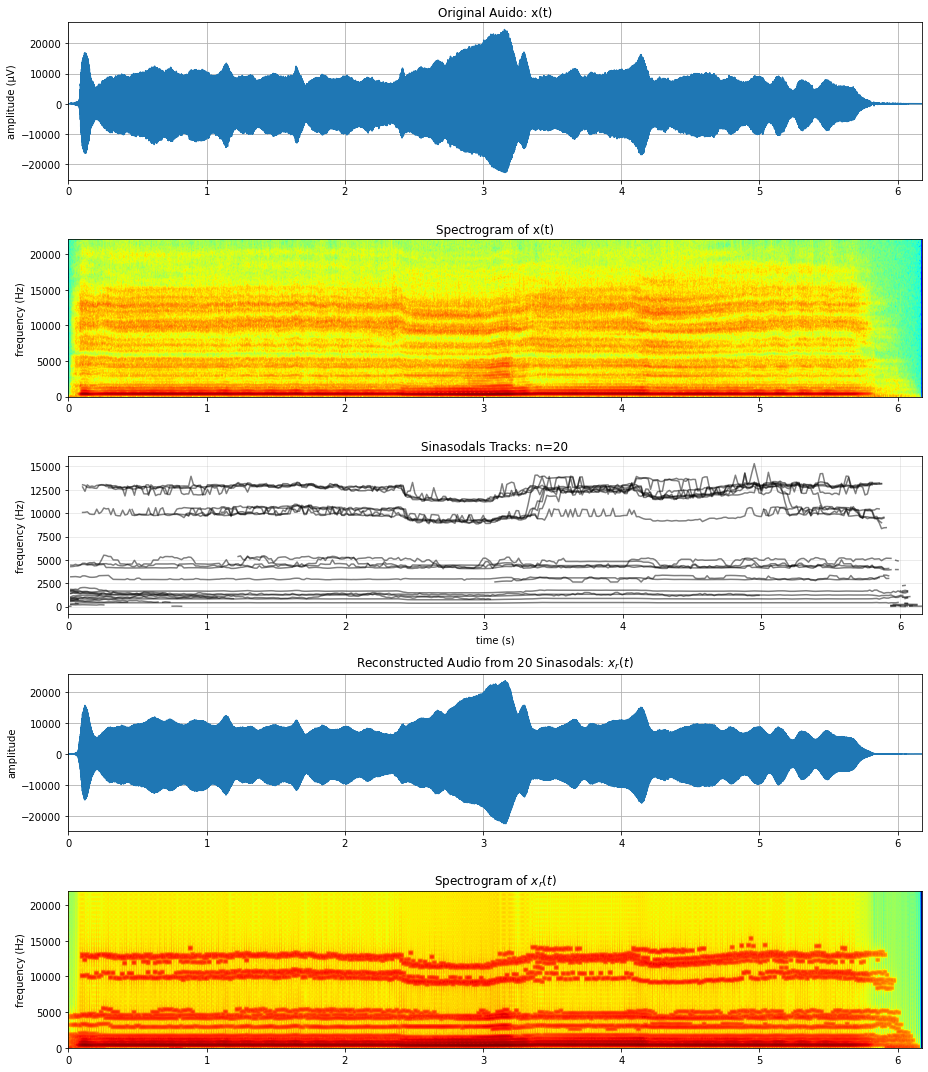

Original Audio: $x(t)$


Reconstructed Audio: $x_r(t)$


In [28]:
plt.figure(figsize=(13,15))
plt.subplot(511)
plt.plot(t,x)
plt.xlim([t[0],t[-1]])
plt.grid()
plt.title('Original Auido: x(t)')
#plt.xlabel('time (s)')
plt.ylabel('amplitude (μV)')



mXt,pXt = sp.stft_analysis(x, winlen=441, overlap=220,window='blackmanharris',nfft=None)

plt.subplot(512)
plt.imshow(mXt.T,aspect='auto',origin='lower',cmap='jet',extent=[t[0],t[-1],0,fs/2])
plt.title('Spectrogram of x(t)')
#plt.xlabel('time (s)')
plt.ylabel('frequency (Hz)')



fXt1 = (fXst.copy())*(mXst>0)
fXt1[fXt1==0]=np.nan


plt.subplot(513)
tx = t[-1]*np.arange(fXt1.shape[0])/fXt1.shape[0]

plt.plot(tx,fXt1,'-k',alpha=0.5)
#plt.ylim([0,fs/2])
plt.xlim([0,tx[-1]])

plt.title(f'Sinasodals Tracks: n={N}')
plt.xlabel('time (s)')
plt.ylabel('frequency (Hz)')
plt.grid(alpha=0.3)



plt.subplot(514)
plt.plot(t,Xr[:len(t)])
plt.xlim([t[0],t[-1]])
plt.grid()
plt.title(f'Reconstructed Audio from {N} Sinasodals: $x_r(t)$')
#plt.xlabel('time (s)')
plt.ylabel('amplitude')


mXrt,pXrt = sp.stft_analysis(Xr, winlen=441, overlap=220,window='blackmanharris',nfft=None)

plt.subplot(515)
plt.imshow(mXrt.T,aspect='auto',origin='lower',cmap='jet',extent=[t[0],t[-1],0,fs/2])
plt.title(r'Spectrogram of $x_r(t)$')
#plt.xlabel('time (s)')
plt.ylabel('frequency (Hz)')
plt.tight_layout()
plt.show()

print('Original Audio: $x(t)$')
display(IPython.display.Audio(x,rate=fs))

print(f'Reconstructed Audio: $x_r(t)$')
display(IPython.display.Audio(Xr,rate=fs))

In [36]:
wavfile.write('singing_female_recons.wav', rate=fs, data=Xr.astype('int16'))

In [37]:
wavfile.write('singing_female_residual.wav', rate=fs, data=(x-Xr[:len(x)]).astype('int16'))